<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Master H-Statistic: Uncover & Visualize Feature Interactions

Have you ever built a machine learning model that performs well overall but mysteriously fails in specific scenarios? Perhaps it accurately predicts bike rentals on sunny weekends but completely misses the mark during rainy rush hours. Or maybe it precisely forecasts energy consumption in moderate temperatures but falters during cold snaps when people use both heating and electronics simultaneously.

Traditional feature importance measures might tell you that "time of day," "weather," or "temperature" matter individually, but they fail to reveal how these features work together to create effects greater than the sum of their parts. It's like knowing that both flour and heat are important for baking, without understanding that their interaction creates something entirely new!

In this lab, we'll dive into Friedman's H-statistic, a powerful tool that detects and quantifies how features collaborate in your model's decision-making process. 


Estimated time needed: **45** minutes


## __Table of Contents__

<ol>
   <li><a href="#Objectives">Objectives</a></li>
   <li>
       <a href="#Setup">Setup</a>
       <ol>
           <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
           <li><a href="#Cloning-`h_statistic_light`-Library-From-Github">Cloning `h_statistic_light` library from Github</a></li>
           <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
       </ol>
   </li>
   <li><a href="#Feature-Interactions">Feature Interactions</a></li>
    <li><a href="#Individual-Conditional-Expectation-(ICE)-Plots">Individual Conditional Expectation (ICE) Plots</a></li>
    <li><a href="#ICE-Function-for-No-Feature-Interaction-Model">ICE Function for No Feature Interaction Model</a></li>
    <li><a href="#Partial-Dependence-Plots-(PDP)">Partial Dependence Plots (PDP)</a></li>
    <li><a href="#Pairwise-H-Statistic">Pairwise H-Statistic</a></li></li>
    <li><a href="#One-vs-All-(Total)-H-statistic">One-vs-All (Total) H-statistic</a></li></li>
    <li><a href="#Apply-H-Statistic-on-Bike-Sharing-Dataset">Apply H-Statistic on Bike Sharing Dataset</a></li></li>
</ol>

<li><a href="#Exercises">Exercises</a></li>
<li><a href="#Authors">Authors</a></li>
<li><a href="#Contributors">Contributors</a></li>


## Objectives

By the end of this lab, you will be able to:

1. **Generate and analyze synthetic data with controlled interactions**: Create datasets with predetermined interaction effects using both `generate_interaction_data` and `generate_linear_interaction_data` to better understand how the H-statistic detects these relationships.

2. **Visualize feature interactions using PDP and ICE plots**: Interpret how features influence predictions individually and jointly through Partial Dependence Plots and Individual Conditional Expectation curves.

3. **Quantify interaction strength in decision trees and random forests**: Apply the H-statistic to measure how strongly features interact in tree-based models and compare models with and without interactions.

4. **Apply interaction analysis to real-world bike sharing data**: Discover meaningful feature interactions in the UCI Bike Sharing dataset that explain rental patterns across different conditions.

5. **Interpret pairwise H-statistics (Hij) and one-vs-all metrics (Hj)**: Identify which feature combinations have the strongest interactions and which individual features interact most strongly with all other variables.

6. **Compare additive vs. interactive model behaviors**: Understand when a model's predictions can be explained by summing individual feature effects versus when interaction effects dominate.

This lab bridges the gap between model accuracy and model interpretability, showing you how to uncover the hidden relationships that drive predictions in complex machine learning models. By mastering the H-statistic, you'll gain valuable insights for feature engineering and model development that go far beyond traditional feature importance measures.


----


## Setup


For this lab, we will be using the following libraries:

* [`pandas`](https://pandas.pydata.org/) for data manipulation and analysis of our datasets, including the Bike Sharing dataset.
* [`numpy`](https://numpy.org/) for numerical operations and generating synthetic data with controlled interaction effects.
* [`scikit-learn`](https://scikit-learn.org/stable/) for implementing decision tree and random forest regressors, as well as the PartialDependenceDisplay functionality.
* [`matplotlib`](https://matplotlib.org/) for visualizing feature interactions and partial dependence plots.
* [`seaborn`](https://seaborn.pydata.org/) for enhanced statistical visualizations of interaction patterns.
* [`tqdm`](https://tqdm.github.io/) for progress tracking during computationally intensive H-statistic calculations.
* [`ucimlrepo`](https://archive.ics.uci.edu/ml/index.php) for accessing the Bike Sharing dataset from the UCI Machine Learning Repository.
* [`h_statistic_light`](https://github.com/jsantarc/h_statistic_light) for calculating the H-statistic and generating synthetic interaction data, including the HStatisticCalculator class.


### Installing Required Libraries

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You must run the following cell__ to install them. This step could take **several minutes**; please be patient.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/crvBKBOkg9aBzXZiwGEXbw/Restarting-the-Kernel.png" width="50%" alt="Restart kernel">

**NOTE**: If you encounter any issues, restart the kernel and run it again by clicking the **Restart the kernel** icon.


In [1]:
%pip install pandas==2.2.3 | tail -n 1
%pip install scikit-learn==1.6.1 | tail -n 1   
%pip install matplotlib==3.10.1 | tail -n 1   
%pip install numpy==2.2.5 | tail -n 1   
%pip install matplotlib==3.10.1 | tail -n 1
%pip install seaborn==0.13.2 | tail -n 1  
%pip install ucimlrepo==0.0.7 | tail -n 1  
%pip install tqdm==4.67.1 | tail -n 1 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Cloning `h_statistic_light` library from Github

The `h_statistic_light` library is not available through standard package managers like pip. Instead, we need to clone it directly from GitHub to use it in our environment:


In [2]:
!git clone  https://github.com/jsantarc/h_statistic_light

Cloning into 'h_statistic_light'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 18.99 KiB | 62.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


### Importing Required Libraries

Import all required libraries here:


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
import tqdm
from tqdm import tqdm



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_wine
from sklearn.inspection import PartialDependenceDisplay

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

# Now we'll configure our Python environment to properly access the h_statistic_light library that we cloned from GitHub.
import os
import sys
notebook_dir = os.getcwd()
h_statistic_light_dir = os.path.join(notebook_dir, 'h_statistic_light', 'h_statistic_light')
sys.path.insert(0, h_statistic_light_dir)

## Feature Interactions 

### When 1 + 1 ≠ 2

You may have heard the expression **"1 + 1 doesn’t always equal 2."** In many real-world scenarios, the combined effect of two things can be greater (or smaller) than the sum of their individual effects. 

For example:
- A team with two star players may perform **better than expected** because they complement each other’s skills.
- A high-performance car with both a **powerful engine** and **aerodynamic design** may be faster than just adding up their individual benefits.

This is the idea behind **feature interactions** in machine learning. When two variables interact, their combined effect **is not simply additive**—the impact of one depends on the presence of the other.

---

### Example: Car Price Prediction with Feature Interaction

Let’s consider a machine learning model that predicts the price of a sports car based on:
1. **Color**: Whether the car is **red** or **not red**.
2. **Brand**: Whether the car is **luxury** or **standard**.

To make this explicit, we introduce **indicator variables**:
- `Red` = 1 if the car is red, 0 otherwise.
- `Luxury` = 1 if the car is a luxury brand, 0 otherwise.

### **Without Interaction**
| Red (1=Red) | Luxury (1=Luxury) | Predicted Price ($) |
|-------------|------------------|--------------------|
| 1           | 1                | 120,000          |
| 1           | 0                | 70,000           |
| 0           | 1                | 110,000          |
| 0           | 0                | 60,000           |

We can decompose the price prediction as:
- **Baseline price** (constant term): **$60,000$**
- **Effect of red color**: **+ $10,000$** (if `Red = 1`)
- **Effect of luxury brand**: **+ $50,000$** (if `Luxury = 1`)

Here, **there is no interaction** because the effect of `Red` and `Luxury` are simply **added**. The price increase for a red car is always $10,000, regardless of the brand.

---

### **With Interaction**
| Red (1=Red) | Luxury (1=Luxury) | Predicted Price ($) |
|-------------|------------------|--------------------|
| 1           | 1                | 140,000          |
| 1           | 0                | 70,000           |
| 0           | 1                | 110,000          |
| 0           | 0                | 60,000           |

New decomposition:
- **Baseline price** (constant term): **$60,000$**
- **Effect of red color**: **+ $10,000$** (if `Red = 1`)
- **Effect of luxury brand**: **+ $50,000$** (if `Luxury = 1`)
- **Interaction effect**: **+ $20,000$** (if `Red = 1` and `Luxury = 1`)

Now, the price **only jumps by $30,000 when the car is both red and luxury**. This means the **impact of the red color depends on the brand**—**luxury car buyers value red more than standard car buyers**. 

This **interaction effect** is key because a model that only considers independent effects will **underestimate the price of a red luxury car**.

---

### Why Does This Matter?

In this example, it’s easy to see and quantify the interaction. But in machine learning models with **millions of variables**, we need a way to determine **which variables interact** and **how strongly they do so**.

This is where **Friedman’s H-statistic** comes in. It measures the extent to which a model’s predictions depend on interactions between features. 

For now, we’ve only looked at two features, but the same concept extends to **multiple interactions** in more complex models.


In [4]:
from h_statistic import HStatisticCalculator
from data_generation import generate_interaction_data, generate_linear_interaction_data
from utils import compute_pdp_interaction, compute_pdp_ice

Feature interaction determines how two or more features influence each other. It is closely related to feature correlation—correlated features often exhibit interaction, but this is not always the case. Partial Dependence Plots (PDPs) can be used to detect feature interactions, but they become increasingly complex as the number of features grows.

In this discussion, we will focus on the **H-statistic**, introduced by Friedman (2008), which quantifies feature interactions in a model. Friedman also proposed a continuous version of the statistic, but it only applies to a subset of cases, making it less practical for general use. Therefore, we will use the version that can be visualized in simpler models. To build intuition, let's start with a polynomial model to explore feature interactions in a structured way.


Feature interaction determines how two or more features influence each other. It is closely related to feature correlation—correlated features often exhibit interaction, but this is not always the case. Partial Dependence Plots (PDPs) can be used to detect feature interactions, but they become increasingly complex as the number of features grows.

In this discussion, we will focus on the **H-statistic**, introduced by Friedman (2008), which quantifies feature interactions in a model. Friedman also proposed a continuous version of the statistic, but it only applies to a subset of cases, making it less practical for general use. Therefore, we will use the version that can be visualized in simpler models. To build intuition, let's start with a polynomial model to explore feature interactions in a structured way.


### Polynomial Models and Feature Interaction

The table below illustrates two models: one without feature interaction and one with feature interaction.

| **Feature Interaction**  | **No Feature Interaction** |
|----------------------------|-------------------------|
| $ f(x_1, x_2) = a_1 x_1 + a_2 x_2 + a_{12} x_1 x_2$ | $ g(x_1, x_2) = b_1 x_1 + b_2 x_2  $ |

The model in the second column is a simple linear regression model where each feature contributes independently to the output.

In contrast, the first model includes an **interaction term** $ a_{12} x_1 x_2 $, which captures the combined effect of $ x_1 $ and $ x_2 $. For example:
- If $ x_1 = 2 $ and $ x_2 = 2 $, the interaction term contributes an offset of $ 4a_{12} $.
- If $ x_1 = 4 $ and $ x_2 = 4 $, the offset increases to $ 16a_{12} $.

This demonstrates how interaction terms introduce a nonlinear offset in the model’s output.

While polynomial models make it easy to visualize interaction terms, real-world models, such as **Random Forests (RFs)**, are more difficult to interpret. However, using **PDP plots**, we can reveal similar feature interaction behaviors in RF models. By analyzing the PDP curves, we can determine whether an RF model exhibits interactions similar to those observed in polynomial models.


## Individual Conditional Expectation (ICE) Plots

### Overview of ICE Plots
Individual Conditional Expectation (**ICE**) plots visualize how a model's prediction changes as a feature of interest, $x_s$, varies while keeping other features, $x_{-s}$, fixed. Unlike **Partial Dependence Plots (PDPs)**, which average the effect across all samples, ICE plots show **one curve per observation**. This allows us to detect feature interactions.

### ICE Function for Feature Interaction Model

For the interaction model:

$ f(x_1, x_2) = a_1 x_1 + a_2 x_2 + a_{12} x_1 x_2 $

where:
- $x_s$ is the feature of interest (e.g., $x_1$)
- $x_{-s}$ is the feature not of interest (e.g., $x_2$), fixed for each observation
- $x_{si}$ represents sampled values of $x_s$ from the dataset

### ICE Expression:

For a fixed $x_{-s}$, the ICE function is:

$ f^i(x_s) = a_1 x_s + a_2 x_{-s} + a_{12} x_s x_{-s} $

### Example Table for Different $x_{-s}$ Values:

| $i$ | $f(x_s, x_{si})$ |
|------|----------------|
| 1    | $ f(x_s, 3) = a_1 x_s + a_2 (3) + a_{12} x_s (3) $ |
| 2    | $ f(x_s, -4) = a_1 x_s + a_2 (-4) + a_{12} x_s (-4) $ |


- The interaction term $a_{12} x_s x_{-s}$ affects the **slope** of the ICE curves.
As $x_{-s}$ changes, the **slope of the ICE function also changes**, meaning the effect of $x_s$ depends on the specific value of $x_{-s}$.

Unfortunately, for models like Random Forests, we cannot directly interpret these results. However, we can use empirical PDP plots to visualize interactions. First, we train a Random Forest model on data wit interaction using the funcion ```generate_interaction_data```.


### Synthetic Dataset Generation

The `generate_interaction_data` function creates a controlled dataset with two features and an adjustable interaction effect:

- **Function Parameters**:
  - `n_samples=1000`: Creates 1,000 data points
  - `noise_power=0.00`: No random noise added to the data
  - `a12=1`: Sets the interaction coefficient between features X1 and X2

- **Data Structure**:
  - Two feature variables (X1, X2) drawn from a multivariate normal distribution
  - Target variable y calculated using the formula: y = a1*X1 + a2*X2 + a12*X1*X2 + noise
  - When a12=1 (as in our code), there is a strong interaction effect between X1 and X2
  - When a12=0, features contribute only independently with no interaction

- **Purpose**:
  - This controlled dataset lets us validate whether our H-statistic correctly identifies the presence and strength of feature interactions
  - With a12=1, we expect the H-statistic to show significant interaction between X1 and X2


In [5]:
# Generate dataset WITH feature interaction (a12=1)
y, X_inter = generate_interaction_data(n_samples=1000, noise_power=0.00, a12=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_inter, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model_inter = DecisionTreeRegressor(max_depth=10, random_state=42)
model_inter.fit(X_train, y_train)

# Evaluate model performance
print(f"\nModel WITH Interaction - Test R² Score: {model_inter.score(X_test, y_test):.4f}")

# Fit to entire dataset for PDP analysis
model_inter.fit(X_inter, y)


Model WITH Interaction - Test R² Score: 0.9673


DecisionTreeRegressor(max_depth=10, random_state=42)

Computing PDP & ICE for feature: X1...


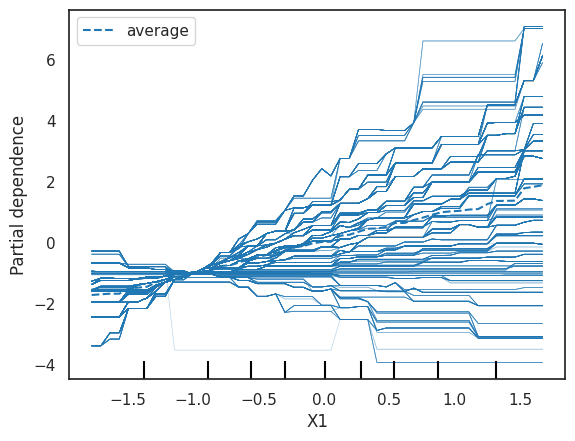

Computing PDP & ICE for feature: X2...


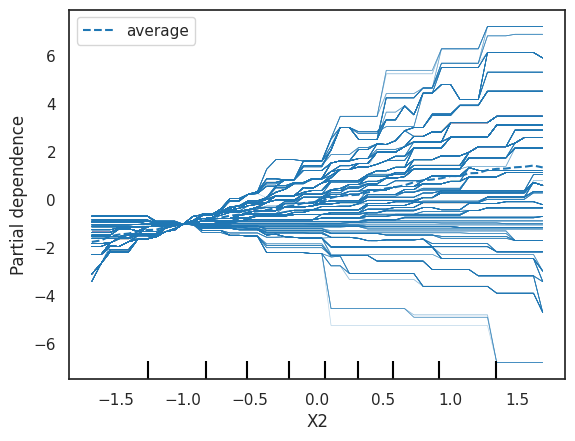

In [6]:
compute_pdp_ice(model_inter, X_inter, features=None, grid_resolution=50)

These plots show how features X1 and X2 influence the model's predictions using Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) curves:

- **Individual Curves (Light Blue)**: Each light blue line represents an ICE curve for a single observation, showing how the prediction changes when only X1 (Image 1) or X2 (Image 2) varies while all other features remain fixed.

- **Average Curve (Dark Blue/Dashed)**: The darker blue line shows the PDP - the average effect of each feature on predictions across all observations.

- **What We Can Observe**:
     - **Non-linearity**: The relationships between both X1/X2 and the target aren't linear, with significant jumps at certain threshold values.
     - **Diverging ICE curves**: The individual lines fan out rather than remaining parallel, particularly for values > 0, indicating strong interaction effects.
     - **Heterogeneous Effects**: The same change in X1 or X2 has different impacts on different observations, seen by slopes varying across individual ICE curves.
     - **Thresholds**: Both features show critical threshold points (around X=0.5) where their influence on predictions changes dramatically.

- **Key Insight**: The fanning pattern in both plots suggests these features interact strongly with other variables - their effect depends on the values of other features, which is precisely what the H-statistic will quantify.


---

## ICE Function for No Feature Interaction Model

For the **no interaction model**:

$ g(x_1, x_2) = b_1 x_1 + b_2 x_2 $

### ICE Expression:

$ g^i(x_s) = b_1 x_s + b_2 x_{-s} $

### Example Table for Different $x_{-s}$ Values:

| $i$ | $g(x_s, x_{si})$ |
|------|----------------|
| 1    | $ g(x_s, 3) = b_1 x_s + b_2 (3) $ |
| 2    | $ g(x_s, -4) = b_1 x_s + b_2 (-4) $ |


- Since there is **no interaction term**, the ICE curves are **parallel lines**.
- Changing $x_{-s}$ only **shifts the ICE curve up or down** but does **not change the slope**.


Unlike a polynomial model, we cannot easily determine if a Random Forest model has no feature interaction. However, we can use empirical PDP plots. When examining the PDP plot for a Random Forest model trained on data without interaction, we observe that, similar to the polynomial model, the slope remains constant, but the offset changes.


In [7]:
# Generate dataset WITHOUT feature interaction (a12=0)
y, X_no_inter = generate_interaction_data(n_samples=1000, noise_power=0.00, a12=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_inter, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model_no_inter = DecisionTreeRegressor(max_depth=10, random_state=42)
model_no_inter.fit(X_train, y_train)

# Evaluate model performance
print(f"Model WITHOUT Interaction - Test R² Score: {model_no_inter.score(X_test, y_test):.4f}")

# Fit to entire dataset for PDP analysis
model_no_inter.fit(X_no_inter, y)

Model WITHOUT Interaction - Test R² Score: 0.9841


DecisionTreeRegressor(max_depth=10, random_state=42)

Computing PDP & ICE for feature: X1...


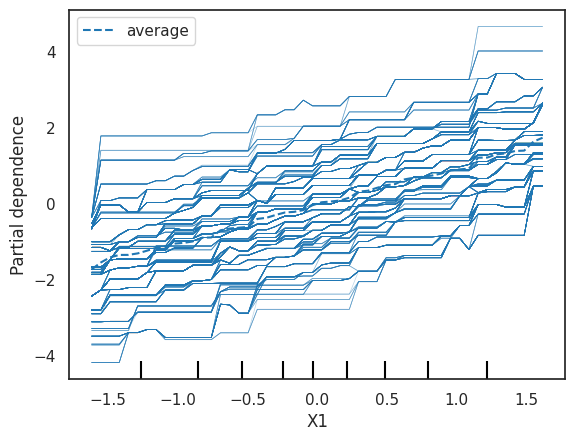

Computing PDP & ICE for feature: X2...


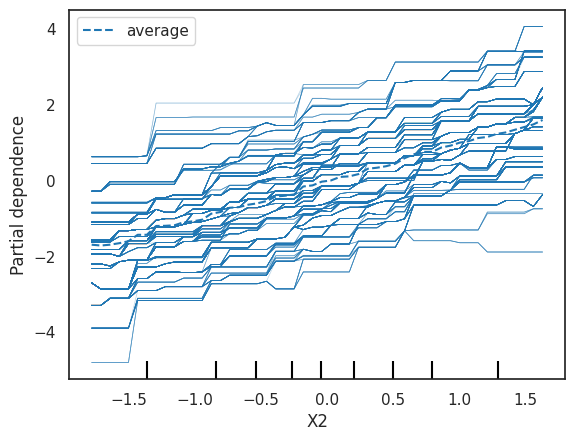

In [8]:
compute_pdp_ice(model_no_inter, X_no_inter, features=None, grid_resolution=50)

These plots show how features X1 and X2 influence the model's predictions using Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) curves:

- **Individual Curves (Light Blue)**: Each light blue line represents an ICE curve for a single observation, showing how the prediction changes when only X1 (Image 1) or X2 (Image 2) varies while all other features remain fixed.

- **Average Curve (Dark Blue/Dashed)**: The darker blue line shows the PDP - the average effect of each feature on predictions across all observations.

- **What We Can Observe**:
     - **More Parallel Lines**: Unlike models with interactions, the ICE curves remain relatively parallel across the range of X1 and X2 values.
     - **Consistent Effects**: The influence of changing X1 or X2 is more uniform across different observations.
     - **Stepwise Patterns**: The decision tree model creates distinct step functions with discrete jumps at threshold values.
     - **Monotonic Trend**: Both features show a generally positive relationship with the target variable.

- **Key Insight**: The parallel nature of these curves accurately reflects the data generation process where a12=0 (no interaction term). When features truly act independently, ICE curves don't fan out dramatically, confirming the absence of interaction effects in the underlying data.




## Key Differences in ICE Behavior

## Key Differences in ICE Plot Patterns

| Characteristic | With Interaction (a12=1) | Without Interaction (a12=0) | What This Means |
|----------------|--------------------------|----------------------------|----------------|
| **Line Pattern** | Diverging/fanning lines | Parallel or nearly parallel lines | Diverging lines indicate that the effect of one feature depends on another feature's value. Parallel lines show independent effects not influenced by other features. |
| **Effect Consistency** | Same change in X1 or X2 produces different effects depending on other feature values | Same change in X1 or X2 produces similar effects regardless of other feature values | Inconsistent effects signal that you cannot generalize about a feature's impact - its influence varies based on context. Consistent effects allow for simpler "on average" interpretation. |
| **Vertical Spacing** | Irregular gaps between lines | More consistent vertical spacing between lines | Irregular gaps reveal complex conditional relationships where certain feature value combinations produce disproportionate effects. Regular spacing suggests predictable, additive contributions. |
| **Slope Variation** | High variation in slopes across observations | Similar slopes across different observations | Varying slopes mean the "rate of change" of the target with respect to the feature differs across data points, requiring segment-specific analysis. Similar slopes allow for uniform interpretation across the feature range. |
| **Visual Metaphor** | Like light rays spreading through a prism | Like venetian blinds moving together | The prism effect shows how interactions create varied behaviors from a single input change. The venetian blind effect shows simpler, coordinated movements regardless of other conditions. |


| Model Type | ICE Curve Behavior |
|------------|------------------|
| **With Interaction** $f(x_s, x_{si})$ | **Slope changes** based on $x_{-s}$. Different observations have different trajectories. |
| **Without Interaction** $g(x_s, x_{si})$ | **Parallel lines** with the same slope. Changing $x_{-s}$ only shifts the curve vertically. |

This highlights why ICE plots are useful in detecting feature interactions—if curves are **not parallel**, it suggests an interaction effect.


---


## Partial Dependence Plots (PDP)

### Introduction

Partial Dependence Plots (PDPs) help us visualize the relationship between a feature and the predicted outcome of a machine learning model while accounting for the effects of all other features.

For a function $\hat{f}(X_1, X_2)$, we can compute $\text{PDP}(X_1)$ and $\text{PDP}(X_2)$. When these plots are nearly identical, it suggests that the combined effect of $X_1$ and $X_2$ on the model is approximately the sum of their independent effects.

### Core Concept

The **Partial Dependence Function (PDF)** measures the **marginal effect** of a feature of interest, $X_S$, on the model's predictions $\hat{f}(X)$. It isolates the relationship between $X_S$ and $\hat{f}(X)$ by **averaging out** the effects of all other features, $X_{-S}$.

Unlike **Individual Conditional Expectation (ICE) plots**, which display conditional effects for each observation, PDP curves provide a **global interpretation** by computing the expected model output across different values of $X_S$.

**Key Terms:**  
- **$X_S$**: The **feature(s) of interest** whose effect we want to study.  
- **$X_{-S}$**: The **set of all other features** that we average over.  

### Mathematical Definition

The **Partial Dependence Function** is defined as:

$$
\hat{f}_{X_S}(x_S) = \mathbb{E}_{X_{-S}}[\hat{f}(x_S, X_{-S})] = \int \hat{f}(x_S, X_{-S}) \, dP(X_{-S})
$$

This function **integrates over all possible values** of the complement feature set, $X_{-S}$, while keeping $X_S$ fixed. It calculates the **expected prediction** for a given value of $X_S$.

For example, if we fix the meal type as **Breakfast** ($X_S = \text{Breakfast}$), we integrate over all possible drink types ($X_{-S}$) to compute the average food poisoning probability for **Breakfast**.

### Monte Carlo Approximation

Since the true distribution $P(X_{-S})$ is often unknown, we approximate the integral using a **Monte Carlo summation** over the observed dataset:

$$
\hat{f}_{X_S}(x_S) \approx \frac{1}{n} \sum_{i=1}^n \hat{f}(x_S, x_{-S,i})
$$

where:
- **$x_S$**: The fixed value of the feature of interest (e.g., meal type = **Breakfast**).
- **$n$**: The number of observations in the dataset.
- **$x_{-S,i}$**: The observed values of the other features for the $i$-th observation.

In practice, we typically use this Monte Carlo approximation for computing PDPs.

### Multi-Feature PDPs

#### Two-Feature PDP

The Partial Dependence Function for two features $X_i$ and $X_j$ is defined as:

$$
\text{PDP}(x_i, x_j) = \mathbb{E}_{X_{-\{i,j\}}}[\hat{f}(x_i, x_j, X_{-\{i,j\}})] = \frac{1}{n} \sum_{k=1}^n \hat{f}(x_i, x_j, x_{-\{i,j\},k})
$$

where:
- $X_i, X_j$ are the features of interest.
- $X_{-\{i,j\}}$ represents all other features except $X_i$ and $X_j$.
- The expectation is taken over the distribution of $X_{-\{i,j\}}$.

#### General Multi-Feature PDP

We can extend the PDP to multiple features $X_S = \{X_1, X_2,...,X_D\}$:

$$
\text{PDP}(x_1, x_2,...,x_D) = \mathbb{E}_{X_{-S}}[\hat{f}(x_1, x_2,...,x_D, X_{-S})] = \frac{1}{n} \sum_{i=1}^n \hat{f}(x_1, x_2,...,x_D, x_{-S,i})
$$

### Computational Challenges

Computing PDPs for multiple features is significantly more complex than for a single feature. The reason lies in the curse of dimensionality.

For a single feature $X_j$, the PDP is computed as:

$$
\text{PDP}_{X_j}(x_j) = \mathbb{E}_{X_{-j}}[\hat{f}(x_j, X_{-j})] = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x_j, x_{-j,i})
$$

When generalizing to multiple features in set $S$, such as computing $\text{PDP}_{X_S}(x_S)$, we need to marginalize over all variables not in $S$:

$$
\text{PDP}_{X_S}(x_S) = \mathbb{E}_{X_{-S}}[\hat{f}(x_S, X_{-S})] = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x_S, x_{-S,i})
$$

For example, if we have four features $X_1, X_2, X_3, X_4$ and we want to compute the PDP for the first three features, then for each fixed combination of $X_1, X_2, X_3$, we must average over all possible values of $X_4$:

$$
\text{PDP}_{X_1, X_2, X_3}(x_1, x_2, x_3) = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x_1, x_2, x_3, x_{4,i})
$$

#### Curse of Dimensionality

The computational complexity grows exponentially with the number of features in $X_S$:

- If we want to evaluate the PDP at $L$ different values for each feature
- And we have $D$ features in set $S$
- With $n$ total samples

The computation scales as $O(L^D \times n)$.

This exponential growth in computational cost is the **curse of dimensionality**. As the number of features increases, the number of function evaluations required to compute the PDP grows exponentially, making exact computation infeasible for high-dimensional models.

To mitigate this, sampling methods are often used to approximate the PDP instead of computing it exactly. However, insufficient sampling can introduce estimation errors, especially in models where strong feature interactions exist.

### Summary

Partial Dependence Plots (PDPs) are powerful tools for interpreting machine learning models by visualizing the marginal effect of features on predictions. They help us understand how features influence model outputs while accounting for the effects of other features.

Key points to remember:
- PDPs average out the effects of all features except those of interest
- Monte Carlo approximation makes PDPs computationally feasible
- Multi-feature PDPs face the curse of dimensionality
- PDPs provide global interpretations, unlike ICE plots which show individual effects



---


## Pairwise H-Statistic


The pairwise  H-statistic can be used to:

1. Identify which pairs of features interact most strongly
2. Guide feature engineering by suggesting which features might benefit from creating interaction terms
3. Improve model interpretability by highlighting important feature relationships
4. Inform feature selection by identifying redundant or synergistic features


### Interpretation:
- $H_{jk} = 0$  There is **no interaction** between features $X_j$ and $X_k$  
   *Example:* If `income` and `age` have $H_{jk} = 0$, knowing both doesn't help more than knowing them individually.

- $H_{jk}$ closer to 1 → There is a **strong interaction** between $X_j$ and $X_k$  
   *Example:* If `hours_studied` and `sleep_quality` have $H_{jk} = 0.6`, the model uses them *together* to predict performance.





Lets understand how it works. When examining how features influence a model's predictions, we're often interested in whether features act independently or interact with each other. For features that act independently, their combined effect on the model's output should be additive.

In a simple polynomial case, if two features $X_1$ and $X_2$ are independent, they would appear in the form:  
$$ g(X_1, X_2) = b_1 X_1 + b_2 X_2  $$

Where $g$ represents the model function, and $b_1$ and $b_2$ are coefficients.We can extend this concept to multiple features and models. For a set of features $X_S$, two features $X_i$ and $X_j$ are considered independent if:

$$
g(X_i, X_j, X_{-S}) = g_i(X_i, X_{-S}) + g_j(X_j, X_{-S})
$$

Where:
- $X_{-S}$ is the set of features excluding $X_i$ and $X_j$
- $g_i$ and $g_j$ are functions that depend only on their respective features

Determining feature independence explicitly is challenging for several reasons:

1. Complex models like random forests or bagging ensembles may not use all features for each prediction
2. Even if a model generally follows independence conditions, some instances may show interactions
3. Direct analysis of model internals is often infeasible for black-box models


Partial Dependence Plots (PDPs) offer an ideal approach for assessing feature independence, as they focus on average predictions across the feature space.

If two features $X_i$ and $X_j$ are truly independent in their influence on the model, then:

$$
\text{PDP}_{i,j}(X_i, X_j) = \text{PDP}_i(X_i) + \text{PDP}_j(X_j)
$$

This means we can test for independence by checking whether:

$$
\text{PDP}_{i,j}(X_i, X_j) - \text{PDP}_i(X_i) - \text{PDP}_j(X_j) = 0
$$

If this difference is zero, the features $X_i$ and $X_j$ are independent in terms of their influence on the model. However, in practice, this difference is rarely exactly zero, so we need a way to quantify the degree of interaction.

### The H-Statistic

The **H-statistic**, introduced by **Friedman and Popescu**, provides a standardized measure of interaction strength between two features. For features $X_j$ and $X_k$, it is defined as:

$$
H^2_{j,k} = \frac{\sum_{i=1}^{n} \left[ \text{PDP}_{j,k}(x_j^{(i)}, x_k^{(i)}) - \text{PDP}_j(x_j^{(i)}) - \text{PDP}_k(x_k^{(i)}) \right]^2}{\sum_{i=1}^{n} \text{PDP}_{j,k}^2(x_j^{(i)}, x_k^{(i)})}
$$

Where:
- $n$ is the number of observations
- $x_j^{(i)}$ and $x_k^{(i)}$ are the values of features $X_j$ and $X_k$ for the $i$-th observation
- The numerator captures the squared deviations from independence
- The denominator normalizes by the overall strength of the joint partial dependence



We can calculate the **Partial Dependence Plot (PDP)** for features $x_1$ and $x_2$, as well as their independent PDP plots. 

For a function $g(x_{1}, x_{2})$, $PDP_{j,k}(x_j, x_k)$ we compute $PDP_j(x_j)$ and $PDP_i(x_i)$. Upon comparison, we observe that they are almost identical, indicating that the combined effect of $X_1$ and $X_2$ on the model is nearly the sum of their independent effects.


Normalized MSE difference: 0.010981


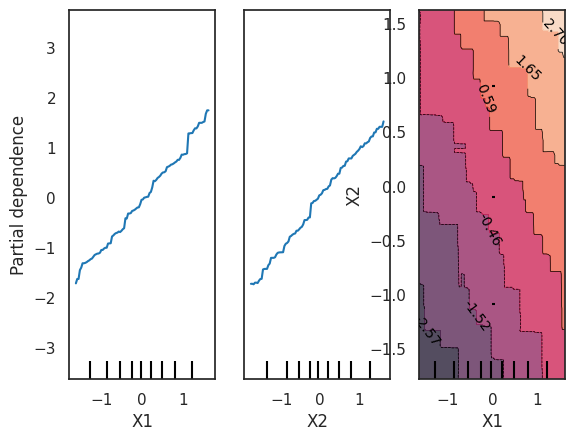

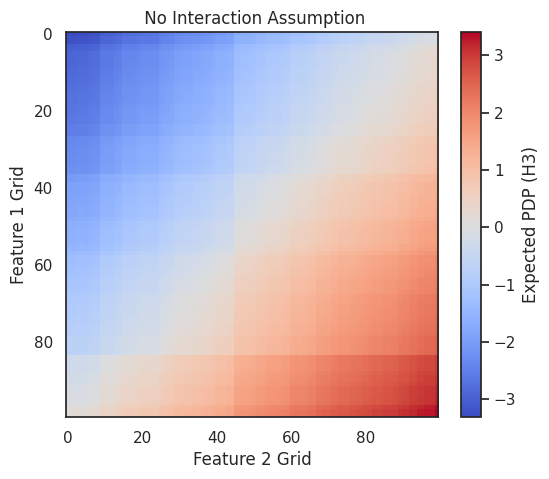

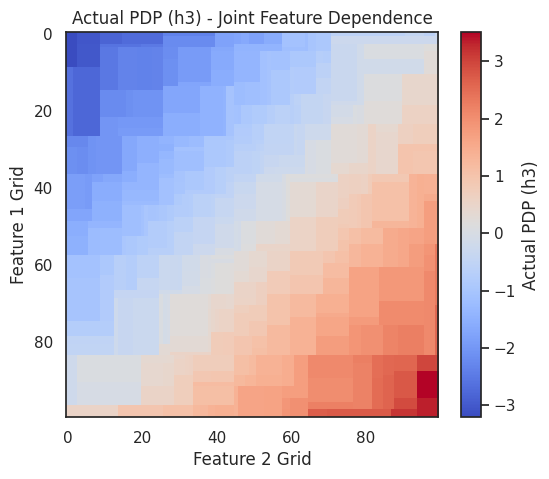

In [9]:
# Define feature pair for PDP analysis
feature_pair = (("X1"), ("X2"), ("X1", "X2"))

# Compute Partial Dependence for model_no_inter
pdp_result_no_inter = PartialDependenceDisplay.from_estimator(
    model_no_inter, X_no_inter, features=feature_pair, grid_resolution=100
)

# Compute PDP interaction analysis
H3_no_inter, h3_no_inter = compute_pdp_interaction(pdp_result_no_inter)

#### Understanding PDP Interaction Analysis Plots

These plots visualize how features X1 and X2 interact in a model without programmed interactions (a12=0):

- **Image 1: Three-Panel Overview**
     - **Left & Middle Panels**: Show the 1D partial dependence plots for X1 and X2 individually. The linear relationships indicate both features independently contribute to predictions in a linear manner.
     - **Right Panel**: Shows the 2D partial dependence plot for the joint effect of X1 and X2. The color gradient and contour lines represent prediction values across different combinations of X1 and X2.
     - **Normalized MSE difference (0.012364)**: This small value indicates minimal deviation between expected additive effects and actual joint effects, confirming weak interaction.

- **Image 2: Expected PDP (H3) Under No Interaction**
     - This heatmap shows what we would expect if X1 and X2 had purely additive effects (no interaction).
     - The smooth diagonal color transition suggests predictions change consistently as both features change.
     - This represents the mathematical sum of individual feature effects (H1+H2).

- **Image 3: Actual PDP (h3) - Joint Feature Dependence**
     - Shows the actual joint partial dependence computed from the model.
     - The pattern looks very similar to Image 2, confirming the features largely behave independently.

- **Key Insight**: The similarity between Images 2 and 3 confirms our model correctly captured the non-interactive nature of the data. When features truly don't interact (as in our a12=0 dataset), the actual joint dependence closely matches what we'd expect from simply adding individual effects.


 We can calulate the pairwise H-statistic  we seen it is almost zero as there is no interaction


In [10]:
H_statistic = np.sum((H3_no_inter-h3_no_inter ) ** 2) / np.sum(H3_no_inter ** 2)
print(f"pairwise H-statistic : {H_statistic:.6f}")

pairwise H-statistic : 0.010935


We can calculate the **Partial Dependence Plot (PDP)** for features $X_1$ and $X_2$, as well as their independent PDP plots.

For a function $f(X_1, X_2)$, we compute the joint partial dependence $PDP_{j,k}(X_j, X_k)$ along with the independent partial dependencies $PDP_j(X_j)$ and $PDP_i(X_i)$. Upon comparison, we observe that they are **not** identical, indicating that the combined effect of $X_1$ and $X_2$ on the model is **not simply the sum** of their independent effects. This suggests the presence of feature interaction.




Normalized MSE difference: 0.343079


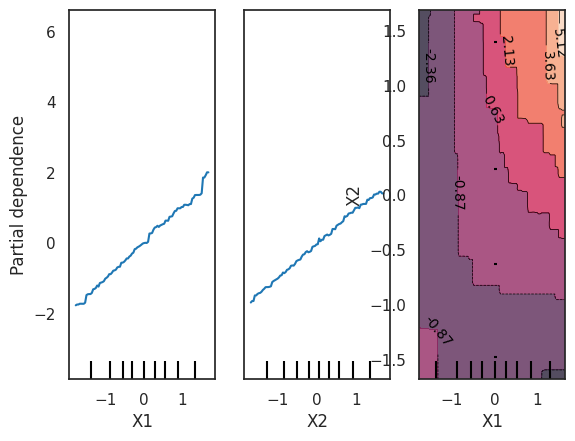

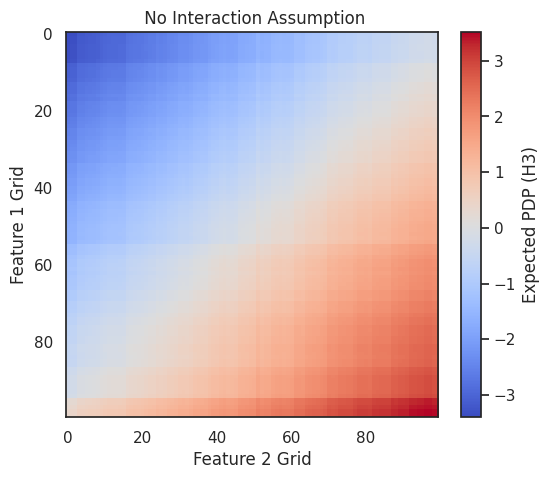

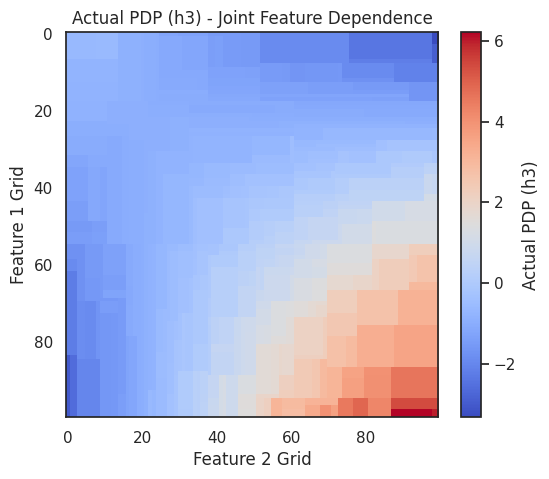

In [11]:
# Compute Partial Dependence for model_inter
pdp_result_inter = PartialDependenceDisplay.from_estimator(
    model_inter, X_inter, features=feature_pair, grid_resolution=100
)

# Compute PDP interaction analysis
H3_inter, h3_inter = compute_pdp_interaction(pdp_result_inter)


#### Understanding PDP Interaction Analysis with Feature Interaction (a12=1)

These plots visualize how features X1 and X2 interact in a model with programmed interactions (a12=1):

- **Image 1: Three-Panel Overview**
     - **Left & Middle Panels**: Show the 1D partial dependence plots for X1 and X2 individually. Both features show linear relationships with the target.
     - **Right Panel**: Shows the 2D partial dependence plot with more pronounced diagonal contour lines and stronger color gradient compared to the no-interaction case.
     - The contour lines are not parallel to either axis, indicating that the effect of X1 depends on the value of X2 and vice versa.

- **Image 2: Expected PDP (H3) Under No Interaction Assumption**
     - Shows what the joint effect would look like if X1 and X2 had purely additive effects.
     - The color gradient shows a smooth transition that would be expected if features behaved independently.

- **Image 3: Actual PDP (h3) - Joint Feature Dependence**
     - Shows significantly different patterns compared to Image 2.
     - The color scale range is wider (-2 to 6) compared to the expected plot (-3 to 3), indicating stronger effects in certain regions.
     - The bottom-right corner shows much more intense effects than would be predicted by purely additive feature contributions.

- **Key Insight**: The substantial difference between Images 2 and 3 confirms the presence of strong interaction between X1 and X2. The H-statistic quantifies this difference, showing that the actual joint dependence cannot be explained by simply adding individual feature effects. This validates that our analysis correctly identifies interaction effects when they exist in the underlying data (a12=1).


We can calulate the pairwise H-statistic we seen it it much larger than H-statistic with no interaction:


In [12]:
H_statistic = np.sum((H3_inter-h3_inter  ) ** 2) / np.sum(H3_inter ** 2)
print(f" pairwise H-statistic : {H_statistic:.6f}")

 pairwise H-statistic : 0.471765


In general, there are many properties of the H-statistic that are useful for interpretation:
- Values close to 0 suggest features act independently
- Higher values indicate stronger interaction effects
- The statistic allows for ranking feature interactions by strength


## One-vs-All (Total) H-statistic

While the *pairwise* H-statistic examines the interaction between two specific features, we often want to measure whether a *single* feature interacts with *any* of the other features in the model. The **One-vs-All** (or **Total**) H-statistic captures this broader notion of interaction strength.


Suppose you have a model $G(\mathbf{X})$ that predicts an outcome from a feature vector $\mathbf{X} = (X_1, \dots, X_d)$. To check if a particular feature $X_j$ **does not** interact with any of the other features, we would expect an **additive** structure:

$$
G(\mathbf{X}) = G_j(X_j) + G_{-j}(\mathbf{X}_{-j}),
$$

where $\mathbf{X}_{-j}$ denotes all features **except** $X_j$. If this structure holds exactly, there is **no interaction** between $X_j$ and the other features.



In practice, we do not know $G_j$ or $G_{-j}$. Instead, we approximate them with **Partial Dependence Plots (PDPs)**:

- $\text{PDP}_{X_j}(X_j)$ estimates the marginal effect of $X_j$.
- $\text{PDP}_{\mathbf{X}_{-j}}(\mathbf{X}_{-j})$ estimates the combined effect of **all other** features.

Thus, the residual

$$
f(\mathbf{x}) - \text{PDP}_{X_j}(x_j) - \text{PDP}_{\mathbf{X}_{-j}}(\mathbf{x}_{-j})
$$

reflects **how much** the model output $f(\mathbf{x})$ deviates from a purely additive function in $(X_j,\mathbf{X}_{-j})$.


### Formula for the One-vs-All H-statistic

Let $n$ be the number of observations in your dataset. For each observation $i$:

- $\mathbf{x}^{(i)}$ is the feature vector.
- $x_j^{(i)}$ is the value of $X_j$.
- $\mathbf{x}_{-j}^{(i)}$ is the vector of all other feature values.

Then the **One-vs-All H-statistic** is:

$$
H_j^2 =
\frac{ 
\sum_{i=1}^{n}
\left[
f(\mathbf{x}^{(i)})
-
\text{PDP}_{X_j}(x_j^{(i)})
-
\text{PDP}_{\mathbf{X}_{-j}}(\mathbf{x}_{-j}^{(i)})
\right]^2
}{
\sum_{i=1}^{n} 
f(\mathbf{x}^{(i)})^2
}
.
$$

- $f(\mathbf{x})$ is your model’s prediction at $\mathbf{x}$.
- $\text{PDP}_{X_j}(x_j^{(i)})$ is the estimated partial dependence of $X_j$.
- $\text{PDP}_{\mathbf{X}_{-j}}(\mathbf{x}_{-j}^{(i)})$ is the (multi-dimensional) partial dependence of all other features.

**Interpretation**:
- $H_j = 0$ means there is **no** interaction between $X_j$ and the rest.
- $H_j$ closer to 1 means there is a **strong** interaction.



### Note on $\text{PDP}_{\mathbf{X}_{-j}}$

$\text{PDP}_{\mathbf{X}_{-j}}$ is technically a **high-dimensional** partial dependence function. It represents the model’s average prediction over *all* values of $X_j$ when other features are held at $\mathbf{x}_{-j}$. In practice, it is approximated or sampled, since a full grid can be infeasible for large numbers of features see appedex for more.




### One-vs-All (Total) H-statistic  Polynomial Function


Consider the polynomial function $G$ with no interaction terms:

$$
g(x_1, x_2, x_3) = 2x_1 + 3x_2 + 4x_3,
$$

where each feature contributes independently to the output. Now, consider a second function $F$ that includes interaction terms:

$$
F(x_1, x_2, x_3) = 2x_1 + 3x_2 + 4x_3 + 2x_1x_2 + 2x_1x_3 + 2x_2x_3.
$$

In these simple polynomial expressions, it is easy to determine which features interact, since the interaction terms are explicit. However, when using more complex models such as Random Forests, identifying feature interactions becomes much more challenging. Even with just three variables, the presence of many decision trees makes interpretation difficult.

To explore this challenge, we analyze models trained on synthetic datasets with and without feature interactions and evaluate how well Random Forests can capture these interactions.


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Generate data with interaction terms
y_interaction, X_interaction = generate_linear_interaction_data(
    n_samples=1000, noise=0.1,
    a1=2.0, a2=3.0, a3=4.0,
    a12=10.0, a13=10.0, a23=10.0,
    random_state=42
)

# Generate data without interaction terms
y_no_interaction, X_no_interaction = generate_linear_interaction_data(
    n_samples=1000, noise=0.1,
    a1=2.0, a2=1.0, a3=1.0,
    a12=0.0, a13=0.0, a23=0,
    random_state=42
)

# Split data into training and testing sets
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interaction, y_interaction, test_size=0.2, random_state=42)
X_train_no_int, X_test_no_int, y_train_no_int, y_test_no_int = train_test_split(X_no_interaction, y_no_interaction, test_size=0.2, random_state=42)

# Train Random Forest models
rf_model_int = RandomForestRegressor(random_state=42).fit(X_train_int, y_train_int)
rf_model_no_int = RandomForestRegressor(random_state=42).fit(X_train_no_int, y_train_no_int)

# Evaluate models
print(f"Random Forest WITH Interaction - Test R² Score: {rf_model_int.score(X_test_int, y_test_int):.4f}")
print(f"Random Forest WITHOUT Interaction - Test R² Score: {rf_model_no_int.score(X_test_no_int, y_test_no_int):.4f}")

# Fit models on entire dataset for PDP analysis
rf_model_int.fit(X_interaction, y_interaction)
rf_model_no_int.fit(X_no_interaction, y_no_interaction)

# Analyze with HStatisticCalculator
print("\nAnalyzing Random Forest WITH Interaction:")
h_stat_rf_int = HStatisticCalculator(rf_model_int, X_interaction, y_interaction)
#plt.ioff()
print(h_stat_rf_int.compute_one_vs_all_pdp())

print("\nAnalyzing Random Forest WITHOUT Interaction:")
h_stat_rf_no_int = HStatisticCalculator(rf_model_no_int, X_no_interaction, y_no_interaction)

print(h_stat_rf_no_int.compute_one_vs_all_pdp())
#plt.close()  # Close the figure
#plt.ion()


Random Forest WITH Interaction - Test R² Score: 0.8594
Random Forest WITHOUT Interaction - Test R² Score: 0.9618

Analyzing Random Forest WITH Interaction:
PDPs not found. Computing PDPs first.
    h one vs all
X3      0.204361
X1      0.200087
X2      0.198608

Analyzing Random Forest WITHOUT Interaction:
PDPs not found. Computing PDPs first.
    h one vs all
X1      0.078696
X3      0.019822
X2      0.016973


In the model trained on the interaction-rich dataset, all three features exhibit elevated H-statistic values approximately 0.2, indicating that each feature interacts meaningfully with the others—consistent with the underlying function, which includes all pairwise interaction terms. In contrast, the model trained on the additive dataset shows much lower H-statistics, reduced by nearly a factor of 4 to 5, confirming that the learned function is largely additive with minimal interaction.

The Total H-statistic has several useful properties for interpretation:

- Values generally range from 0 to 1 in practice
- A value close to 0 indicates the feature acts independently of all others
- Higher values suggest stronger interactions with other features
- The statistic allows ranking features by their overall interaction strength



### Practical Applications

The Total H-statistic provides a comprehensive measure of a feature's interactions, while the pairwise H-statistic focuses on specific feature pairs. A feature with a high Total H-statistic will likely have high pairwise H-statistics with at least some other features.


1. Identify which features have the strongest interactions with other features
2. Prioritize features for further pairwise interaction analysis
3. Simplify models by identifying features that can be modeled independently
4. Guide feature engineering decisions for complex models


Calculating $\text{PDP}_{X_{-j}}$ requires marginalizing over all features except $X_j$, which is computationally expensive.
In practice, calculating the Total H-statistic often requires efficient sampling approaches and computational optimizations to make it feasible for complex models with many features.statistic (also called the One vs All H-statistic) measures this broader type of interaction.


## Apply H-Statistic on Bike Sharing Dataset
 
We use the Bike Sharing dataset from the UCI Machine Learning Repository, which contains hourly rental data for a bike-sharing system. The dataset includes features such as weather conditions, time-related attributes, and holiday/workday indicators. Understanding how these features—especially time, weather, and calendar variables—interact is key to explaining variation in bike rental counts. In this project, we’re particularly interested in how pairs of features interact to influence the target variable: the number of bikes rented. Let’s begin by fetching the dataset and performing some basic feature engineering.


In [16]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# Extract features and target
X = bike_sharing.data.features
y = bike_sharing.data.targets

X["dteday"]=X["dteday"].map(pd.to_datetime)
X["days_since_2011"]=X['dteday']-pd.to_datetime('2011-01-01')
X["days_since_2011"]=X["days_since_2011"].dt.total_seconds() / (24 * 3600)

X.drop(labels='dteday',  axis=1, inplace=True)

We can sumerize  Bike Sharing Dataset  features in the follwoing dataset.

| Feature         | Description                                                                 | Type           |
|-----------------|-----------------------------------------------------------------------------|----------------|
| season          | 1: Winter, 2: Spring, 3: Summer, 4: Fall                                    | Categorical    |
| yr              | Year (0: 2011, 1: 2012)                                                     | Binary         |
| mnth            | Month (1 to 12)                                                             | Categorical    |
| hr              | Hour of the day (0 to 23)                                                   | Categorical    |
| holiday         | Whether the day is a holiday (1) or not (0)                                 | Binary         |
| weekday         | Day of the week (0: Sunday to 6: Saturday)                                  | Categorical    |
| workingday      | 1 if neither weekend nor holiday, 0 otherwise                               | Binary         |
| weathersit      | 1: Clear, 2: Mist + Clouds, 3: Light Snow/Rain, 4: Heavy Rain/Ice           | Categorical    |
| temp            | Normalized temperature in Celsius (divided by 41)                          | Continuous     |
| atemp           | Normalized "feels like" temperature in Celsius (divided by 50)             | Continuous     |
| hum             | Normalized humidity                                                        | Continuous     |
| windspeed       | Normalized windspeed                                                       | Continuous     |
| dteday          | Date (string format, e.g., '2011-01-01')                                   | Date           |
| days_since_2011 | Days since Jan 1, 2011 (engineered feature for time tracking)              | Continuous     |
| count (target)  | Total number of bike rentals (hourly)                                       | Continuous     |


Train a decision tree regressor to model the target variable:


In [ ]:
# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Validate on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation R²: {r2:.3f}")

# Retrain the model on the entire dataset
model.fit(X, y)

The HStatisticCalculator is used to evaluate interaction strength between features we input the ```model``` featers X and target ```y``` the grid resultion is number of ditmerisitc varmbls $X_s$ or $\mathbf{x}_{-j}$
 


In [ ]:
H_obj=HStatisticCalculator(model, X, y, grid_resolution=10)

Lets take a look at teh *pairwise* H-statistics, that measure how much of the variation in the prediction can be attributed to interactions between two features 


In [ ]:
Hij=H_obj.compute_pairwise_h_statistic()
Hij

When examining the pairwise H-statistics, we consider all possible interactions between features. For 
$D$ features, there are $D(D-1)$ possible pairs. Fortunately, the output is sorted in ascending order, making it easy to identify both the strongest and weakest interactions. In the Bike Sharing dataset, we observe particularly strong interactions among time- and condition-based features. For instance, the interaction between holiday and windspeed (H = 0.60) suggests that windspeed affects bike usage differently on holidays than on regular days. Similarly, the interaction between hour and workingday (H = 0.56) reveals that hourly rental patterns vary notably between working and non-working days, likely due to commuting behaviors. 

Additional interactions, such as weekday with workingday (H = 0.43) and holiday with workingday (H = 0.41), underscore the importance of calendar-based features in shaping usage trends. On the other end, pairs like year and temperature show near-zero H-statistics, indicating little to no interaction—possibly because one of the variables lacks sufficient variability or contributes redundant information to the model.


In a similar manner, we can analyze the one-vs-all H-statistic, which measures how much each individual feature interacts with all other features combined. This helps us understand which variables are most involved in interactions across the dataset.


In [ ]:
Hj=H_obj.compute_one_vs_all_pdp()
Hj

We see, windspeed has the lowest interaction score (H = 0.00046), suggesting that windspeed behaves fairly independently—it does not interact much with other variables. This might mean that people generally avoid riding bikes on windy days, regardless of other conditions. Similarly, season and month also have very low interaction scores, implying they are relatively independent in how they affect bike rentals.
On the other hand, features like day of the week and weather situation show moderate interactions, possibly reflecting subtle behavioral patterns that depend on context (e.g., people may respond differently to the same weather on a weekend vs. a weekday).

Temperature, apparent temperature (atemp), holiday, and workingday all show mid-level interactions, indicating that while these features have a direct effect, their influence also varies depending on other factors.
Notably, hour of the day (H = 0.17) and especially days since 2011 (H = 0.37) have the highest interaction scores, suggesting that temporal patterns are deeply intertwined with other features. The strong interaction from days_since_2011 could reflect long-term trends, seasonal cycles, or structural changes in the data over time.
AssertionError


## Exercises

For the next set in exercises, we will utilize the Real Estate Valuation Data Set.

This dataset was collected from real estate transactions in the Sindian District of New Taipei City, Taiwan. It is commonly used for regression tasks, where the objective is to predict housing prices based on various property-related features. Lets load the dataset and split it in to training and testing data:


In [ ]:
# Fetch the dataset
real_estate_data = fetch_ucirepo(id=477)

### Exercise 1: Extract features and target from `real_estate_data` dataset and divide them into test and train


In [ ]:
#TODO

<details>
    <summary>Click here for hint</summary>

```python
# Extract features and target
X = real_estate_data.data.features
y = real_estate_data.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

</details>


### Exercise 2: Train `RandomForestRegressor` on `real_estate_data` and print MSE and R² values


It was determined that a regression tree did not perform well, so we used a Random Forest regression model instead. The default parameters of the model performed well enough for this exercise.


In [ ]:
#TODO

<details>
    <summary>Click here for hint</summary>

```python
from sklearn.ensemble import RandomForestRegressor
# Train the model on the training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Validate on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Validation MSE: {mse:.2f}")
print(f"Validation R²: {r2:.3f}")

# Retrain the model on the entire dataset (optional)
model.fit(X, y)
```

</details>


It was determined that a regression tree did not perform well, so we used a Random Forest regression model instead.The default parameters of the model performed well enough for this application.



### Exercise 3: Initialize `HStatisticCalculator` using model parameteres and dataset.

We will train a `H_obj` for the next set of exercises.


In [ ]:
#TODO

<details>
    <summary>Click here for hint</summary>

```python
H_obj=HStatisticCalculator(model, X, y, grid_resolution=10)
```

</details>


### Exercise 4: Find the Pairwise H-Statistic


Calculate the pairwise H-statistic to assess feature interactions, and provide an interpretation of the findings.


In [ ]:
#TODO

<details>
    <summary>Click here for a hint</summary>
 
```python
Hij=H_obj.compute_pairwise_h_statistic()
```



Based on the pairwise H-statistic values, house age appears to have the strongest interaction effects with other features. For instance, the interaction between house age (X2) and longitude (X6) has the highest H-statistic value (0.4588), suggesting that older homes in specific geographic locations may significantly influence housing prices.

Another notable interaction is between house age (X2) and distance to the nearest MRT station (X3) with an H-statistic of 0.2021, indicating that older homes that are closer or farther from transit may also have a significant impact on price.

In contrast, features like latitude (X5) and longitude (X6) have relatively weak interactions with each other (0.0619) and with other features. Similarly, number of convenience stores (X4) shows low interaction with distance from MRT (X3) (0.0298), suggesting these features may influence price more independently.

Overall, house age is the most important interacting feature, particularly when combined with location-based variables like longitude and proximity to MRT stations.

</details>


### Exercise 5: One vs All H-Statistic


Calculate the 1 vs all H-statistic to assess feature interactions, and provide an interpretation of the findings.


In [ ]:
#TODO

<details>
    <summary>Click here for hint</summary>

```python
Hj=H_obj.compute_one_vs_all_pdp()
Hj
```
Distance to the nearest MRT station (X3) has the highest H-statistic (22.89), suggesting that proximity to public transportation significantly amplifies or interacts with other features to affect house prices.

Transaction date (X1) also has a high value (18.78), indicating that the timing of buying or selling a house plays a major role, potentially reflecting market trends or seasonal effects.
</details>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Contributors

[Karan Goswami](https://author.skills.network/instructors/karan_goswami) is a data scientist at IBM and is currently pursuing his masters from McMaster University.


Copyright © 2025 IBM Corporation. All rights reserved.
